In [78]:
import pandas as pd

df = pd.read_csv("dataset.csv")

print(df.head())

# shape (rows + columns)
print("Shape:", df.shape)

# column info
print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>


In [79]:
# Dropping the ID column
df = df.drop(columns=["id"])

In [80]:
"""
There are total 5110 rows (Entries). All the features does not have any missing
values except BMI. From the df.info we see that there are 4909 BMI non-null values.

Missing BMI = 5110 − 4909 = 201

I will Fill the missing BMI columns with the median of the BMI.
"""

df["bmi"] = df["bmi"].fillna(df["bmi"].median())
print("Missing BMI values filled with mean: ", df["bmi"].median())


Missing BMI values filled with mean:  28.1


In [81]:
import numpy as np

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

bmi_outliers = detect_outliers("bmi")
glucose_outliers = detect_outliers("avg_glucose_level")

print("BMI Outliers:", len(bmi_outliers))
print("Glucose Outliers:", len(glucose_outliers))

BMI Outliers: 126
Glucose Outliers: 627


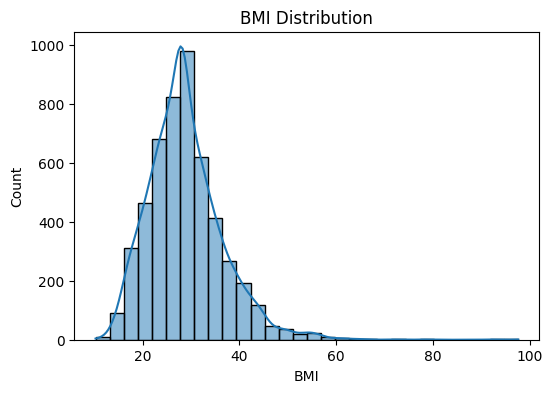

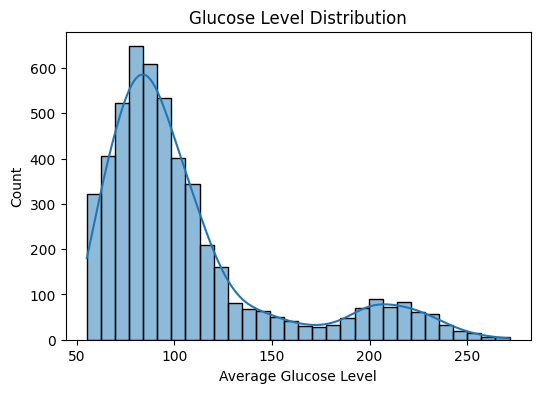

In [82]:
# Visualizing BMI And Glucose distribution to observe outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df["bmi"], kde=True, bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["avg_glucose_level"], kde=True, bins=30)
plt.title("Glucose Level Distribution")
plt.xlabel("Average Glucose Level")
plt.show()


In [83]:
# Handling outliers with a sophisticated method

def winsorize_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

numeric_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numeric_cols:
    df = winsorize_column(df, col)

print("Winsorization done!")


Winsorization done!


In [84]:
"""
Since I have so many outliers (126 in BMI and 627 in Glucose), I replaced
them with the mean of their respective column.
"""

df.loc[bmi_outliers.index, "bmi"] = df["bmi"].median()

df.loc[glucose_outliers.index, "avg_glucose_level"] = df["avg_glucose_level"].median()

print("Outliers updated Successsfully!")


Outliers updated Successsfully!


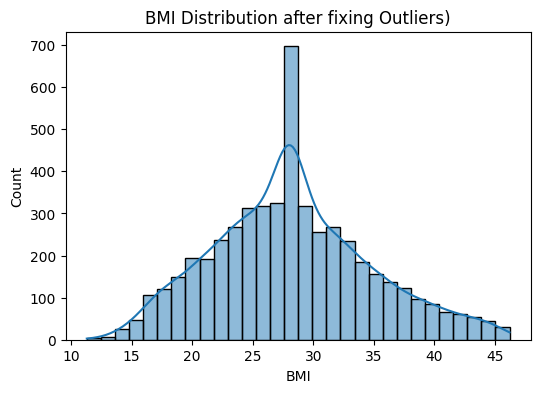

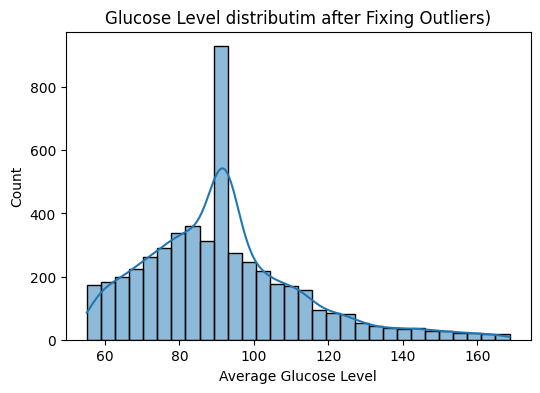

In [85]:
# Visualixing after fixing outliers

plt.figure(figsize=(6,4))
sns.histplot(df["bmi"], kde=True, bins=30)
plt.title("BMI Distribution after fixing Outliers)")
plt.xlabel("BMI")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["avg_glucose_level"], kde=True, bins=30)
plt.title("Glucose Level distributim after Fixing Outliers)")
plt.xlabel("Average Glucose Level")
plt.show()

In [86]:
def bmi_risk_category(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

df['bmi_risk'] = df['bmi'].apply(bmi_risk_category)


In [87]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_risk
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,91.490283,28.248689,0.048728,1.976517
std,22.612647,0.296607,0.226063,21.201454,6.547276,0.215320,0.925824
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,1.000000
50%,45.000000,0.000000,0.000000,91.882500,28.100000,0.000000,2.000000
75%,61.000000,0.000000,0.000000,101.295000,32.200000,0.000000,3.000000
max,82.000000,1.000000,1.000000,168.680000,46.200000,1.000000,3.000000


In [88]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_risk
0,Male,67.0,0,1,Yes,Private,Urban,91.885,36.6,formerly smoked,1,3
1,Female,61.0,0,0,Yes,Self-employed,Rural,91.885,28.1,never smoked,1,2
2,Male,80.0,0,1,Yes,Private,Rural,105.920,32.5,never smoked,1,3
3,Female,49.0,0,0,Yes,Private,Urban,91.885,34.4,smokes,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,91.885,24.0,never smoked,1,1


In [89]:
print(df["gender"].unique())

['Male' 'Female' 'Other']


In [90]:
# Encoding categorial variables

categorical_columns = [
    'gender',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status'
]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df.head())
print("Shape:", df.shape)

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             91.885  36.6       1   
1  61.0             0              0             91.885  28.1       1   
2  80.0             0              1            105.920  32.5       1   
3  49.0             0              0             91.885  34.4       1   
4  79.0             1              0             91.885  24.0       1   

   bmi_risk  gender_Male  gender_Other  ever_married_Yes  \
0         3         True         False              True   
1         2        False         False              True   
2         3         True         False              True   
3         3        False         False              True   
4         1        False         False              True   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False          

In [91]:
# Drop the gender_Other column since it has too low entries

if 'gender_Other' in df.columns:
    df = df.drop(columns=['gender_Other'])
    print("Dropped 'gender_Other' column.")
else:
    print("'gender_Other' column not found (it may have been dropped previously).")

Dropped 'gender_Other' column.


In [92]:
# Changing bolean values to binarty
df = df.astype(int)

print(df.head())
print("New shape:", df.shape)

   age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  bmi_risk  \
0   67             0              1                 91   36       1         3   
1   61             0              0                 91   28       1         2   
2   80             0              1                105   32       1         3   
3   49             0              0                 91   34       1         3   
4   79             1              0                 91   24       1         1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_

In [93]:
"""
normalized age, BMI, and glucose using StandardScaler so all numerical features
have mean 0 and standard deviation 1.  This helps the neural network train more efficiently
and prevents one large-scale feature from dominating others.
"""

# Normalizeing  age, BMI, and glucose using StandardScaler

from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())
print("\n _________ \n", df[numeric_cols].describe())


        age  hypertension  heart_disease  avg_glucose_level       bmi  stroke  \
0  1.050950             0              1           0.002049  1.249392       1   
1  0.785835             0              0           0.002049  0.026328       1   
2  1.625367             0              1           0.662198  0.637860       1   
3  0.255604             0              0           0.002049  0.943626       1   
4  1.581181             1              0           0.002049 -0.585204       1   

   bmi_risk  gender_Male  ever_married_Yes  work_type_Never_worked  \
0         3            1                 1                       0   
1         2            0                 1                       0   
2         3            1                 1                       0   
3         3            0                 1                       0   
4         1            0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1   

In [94]:
# Splitting dataset into x(features) and y(target)
x = df.drop(columns=["stroke"])
y = df["stroke"]

print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (5110, 16)
y shape: (5110,)


In [95]:
# Train/Test Split
# 80% training and 20% test

from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

print("X_train: ", X_train.shape)
print("x_test:  ", X_test.shape)


X_train:  (4088, 16)
x_test:   (1022, 16)


In [96]:
# Apply SMOTE to fix data imbalance

from imblearn.over_sampling import SMOTE

# Initialize SMOTE (random_state ensures reproducibility)
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data (X_train, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original Training Set Distribution:")
print(y_train.value_counts())
print("\nResampled Training Set Distribution (Should be balanced):")
print(y_train_resampled.value_counts())

Original Training Set Distribution:
stroke
0    3889
1     199
Name: count, dtype: int64

Resampled Training Set Distribution (Should be balanced):
stroke
0    3889
1    3889
Name: count, dtype: int64


In [97]:
input_dim = X_train.shape[1]
print("Number of input features:", input_dim)


Number of input features: 16


In [98]:
# Building the model

from tensorflow import keras
from tensorflow.keras import layers

model_resampled = keras.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.2),                   # Special layer (regularization)
    layers.Dense(1, activation="sigmoid")
])

In [99]:
# Compiling
from tensorflow.keras.metrics import Recall, Precision

model_resampled.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    
    metrics=[
        'accuracy',
        Recall(name='recall'),
        Precision(name='precision')
    ]
)

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [101]:
# Training


history = model_resampled.fit(
    X_train_resampled, 
    y_train_resampled,
    
    batch_size=32,
    epochs=40,
    # validation_data=(X_test, y_test), 
    
   callbacks=[early_stop],
    verbose=1
)

Epoch 1/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7940 - loss: 0.4516 - precision: 0.7492 - recall: 0.8840
Epoch 2/40


c:\Users\aftab\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,precision,recall
  current = self.get_monitor_value(logs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8298 - loss: 0.3946 - precision: 0.7772 - recall: 0.9247
Epoch 3/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8399 - loss: 0.3698 - precision: 0.7838 - recall: 0.9388
Epoch 4/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8453 - loss: 0.3562 - precision: 0.7922 - recall: 0.9362
Epoch 5/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8582 - loss: 0.3322 - precision: 0.8068 - recall: 0.9419
Epoch 6/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8570 - loss: 0.3328 - precision: 0.8040 - recall: 0.9442
Epoch 7/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.3175 - precision: 0.8124 - recall: 0.9545
Epoch 8/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8678 - loss: 0.3097 - precision: 0.8138 - recall: 0.9540
Epoch 9/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8677 - loss: 0.3103 - precision: 0.8182 - recall: 0.9455
Epoch 10/40
244/244 ━━━━━━━

In [102]:
loss, accuracy, recall, precision = model_resampled.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test Precision: {precision:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8483 - loss: 0.6335 - precision: 0.0930 - recall: 0.2400          
Test Accuracy: 0.8483
Test Recall: 0.2400
Test Precision: 0.0930


In [103]:
model_resampled.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,341 (48.21 KB)

 Trainable params: 4,113 (16.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,228 (32.14 KB)

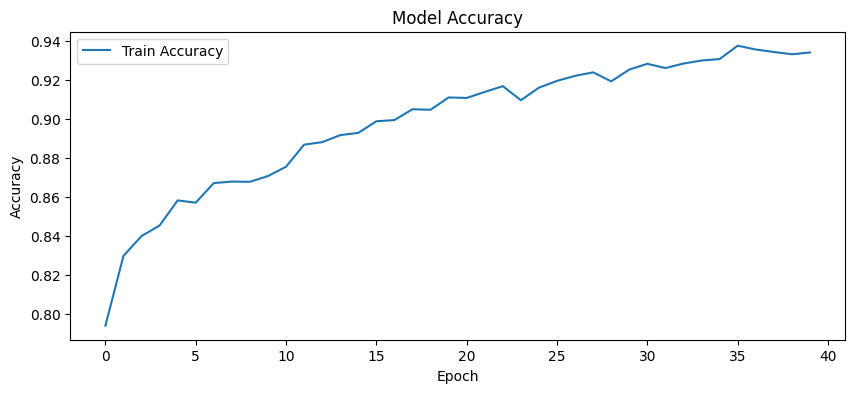

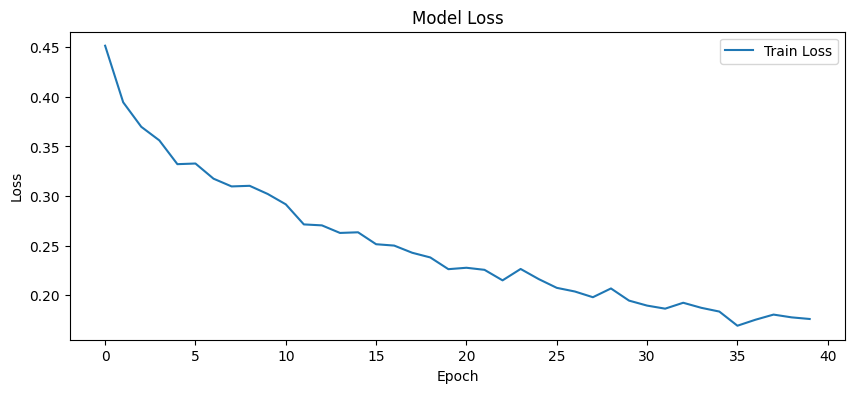

In [104]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


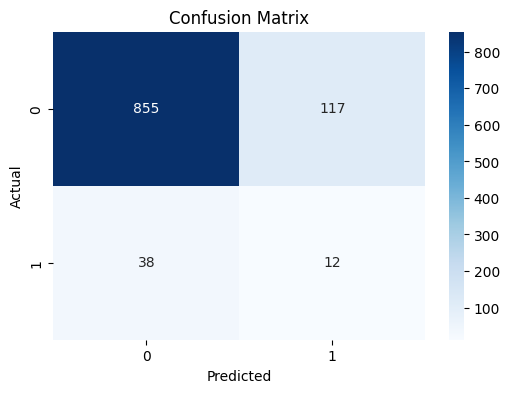

In [105]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = model_resampled.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       972
           1       0.09      0.24      0.13        50

    accuracy                           0.85      1022
   macro avg       0.53      0.56      0.53      1022
weighted avg       0.92      0.85      0.88      1022

